In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [78]:
df_target = pd.read_excel('target_bulk.xlsx')
df_target.columns = ['gene_id'] + list(df_target.columns[1:])
df_target.set_index('gene_id', inplace=True)
df_target.head()

,TCGA-AA-A00K-01A-02R-A002-07
gene_id,
ENSG00000000003.15,120.9696
ENSG00000000005.6,2.2469
ENSG00000000419.13,88.1750
ENSG00000000457.14,4.4022
ENSG00000000460.17,4.2926


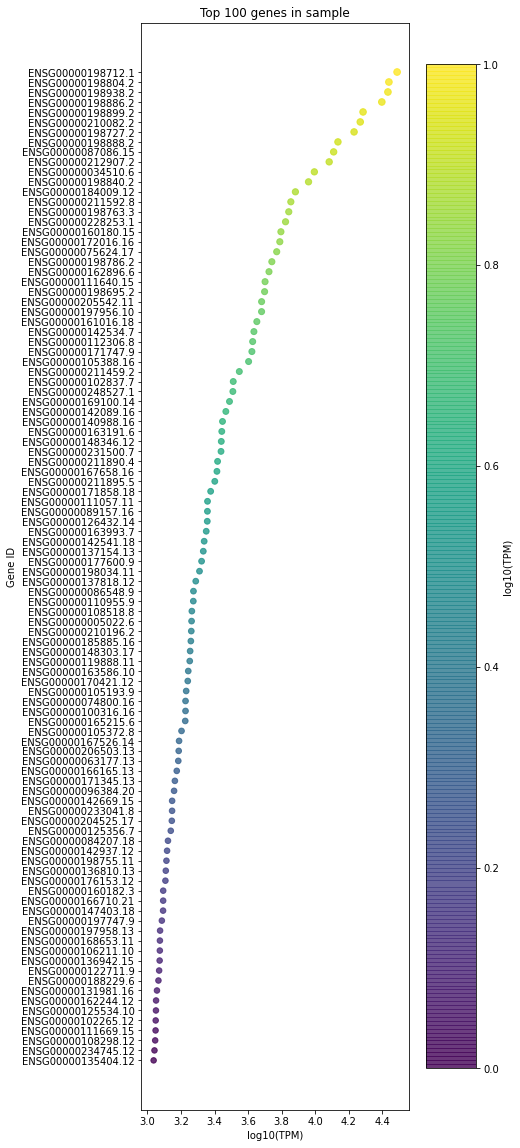

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
samples = df_target.columns[0]

# 从大到小排序
values = df_target[samples].sort_values(ascending=False)[:100]
# 取log10
value = np.log10(values + 1)
gene_ids = value.index

# 创建气泡图
plt.figure(figsize=(6, 20))

# 选择不同的颜色，并反转颜色映射，使用 viridis_r 颜色映射
colors = plt.cm.viridis_r(np.linspace(0, 1, len(value)))  # viridis_r 颜色映射，颜色顺序反转

# 绘制气泡图，调整气泡大小和颜色
plt.scatter(value, gene_ids, s=value * 10, alpha=0.8, c=colors)  # 气泡大小调整为原来的 100 倍
plt.colorbar(label='log10(TPM)')  # 添加颜色条

# 将y轴刻度逆序排列
plt.gca().invert_yaxis()

plt.title('Top 100 genes in sample')
plt.xlabel('log10(TPM)')
plt.ylabel('Gene ID')
plt.savefig('top_100_genes.png', dpi=300)

In [80]:
# 取出每个行索引的前15个字符
df_target.index = df_target.index.str[:15]
df_target

,TCGA-AA-A00K-01A-02R-A002-07
gene_id,
ENSG00000000003,120.9696
ENSG00000000005,2.2469
ENSG00000000419,88.1750
ENSG00000000457,4.4022
ENSG00000000460,4.2926
...,...
ENSG00000288669,0.0000
ENSG00000288670,3.7541
ENSG00000288671,0.0000


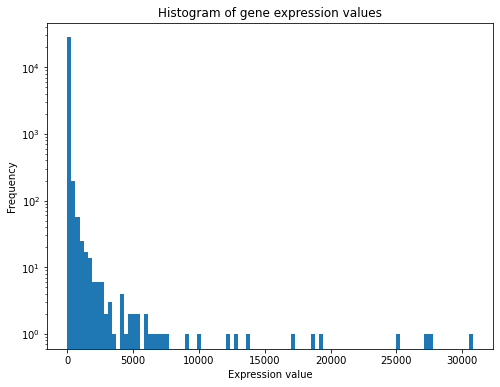

In [81]:
# 直方图
plt.figure(figsize=(8, 6))
# 选取非零值
df_target_nonzero = df_target[df_target > 0]
plt.hist(df_target_nonzero, bins=100, log=True)
plt.title('Histogram of gene expression values')
plt.xlabel('Expression value')
plt.ylabel('Frequency')
plt.savefig('gene_expression_histogram.png', dpi=300)

## 对单一样本的统计学分析


In [82]:
specific_sample_data = df_target

In [83]:
mean_expression = specific_sample_data.mean()
median_expression = specific_sample_data.median()
std_expression = specific_sample_data.std()
min_expression = specific_sample_data.min()
max_expression = specific_sample_data.max()

print(f"均值: {mean_expression}")
print(f"中位数: {median_expression}")
print(f"标准差: {std_expression}")
print(f"最小值: {min_expression}")
print(f"最大值: {max_expression}")

均值: TCGA-AA-A00K-01A-02R-A002-07    16.485328
dtype: float64
中位数: TCGA-AA-A00K-01A-02R-A002-07    0.0
dtype: float64
标准差: TCGA-AA-A00K-01A-02R-A002-07    305.953348
dtype: float64
最小值: TCGA-AA-A00K-01A-02R-A002-07    0.0
dtype: float64
最大值: TCGA-AA-A00K-01A-02R-A002-07    30836.3022
dtype: float64


In [84]:
df = pd.read_csv('COAD_expression_tpm.csv')
# 设置第一列的列名
df.columns = ['gene_id'] + list(df.columns[1:])
# 设置第一列为索引
df.set_index('gene_id', inplace=True)
df

,TCGA-A6-4105-01A-02R-1774-07,TCGA-AA-3506-01A-01R-1410-07,TCGA-AA-3511-01A-21R-1839-07,TCGA-D5-6920-01A-11R-1928-07,TCGA-A6-5664-01A-21R-1839-07,TCGA-AA-3845-01A-01R-1022-07,TCGA-AZ-4315-01A-01R-1410-07,TCGA-DM-A1HA-01A-11R-A155-07,TCGA-F4-6570-01A-11R-1774-07,TCGA-AA-A01F-01A-01R-A002-07,...,TCGA-AA-3518-01A-02R-0826-07,TCGA-D5-6539-01A-11R-1723-07,TCGA-A6-2682-01A-01R-1410-07.1,TCGA-CM-6170-01A-11R-1653-07,TCGA-AY-A71X-01A-12R-A37K-07,TCGA-AA-3561-01A-01R-0821-07,TCGA-G4-6295-01A-11R-1723-07,TCGA-AA-A02E-01A-01R-A00A-07,TCGA-AA-3548-01A-01R-1873-07,TCGA-AA-3939-01A-01R-1022-07
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000198804,5699.776947,2901.052289,14593.565415,6198.486079,6379.975063,5846.103076,4443.678837,3889.645186,6526.669991,21368.114122,...,8599.498090,9880.588520,6500.376457,5697.965205,15399.446403,6791.770751,4381.858481,7801.411455,8233.789506,4276.111375
ENSG00000198886,5930.902952,2261.817472,12419.310807,3756.105307,5511.763053,4505.332070,2060.284747,6212.580365,5180.683586,21539.357520,...,6527.743243,6505.592886,3970.707904,5447.697660,9946.804521,4054.228969,4892.717497,6744.621057,7681.288936,3339.918160
ENSG00000198712,6085.026088,5695.698114,28192.968192,5242.271533,7347.858115,6095.690019,6641.482211,5623.499154,7009.393895,37647.789396,...,8946.304675,9862.383737,8842.880657,9947.710833,17142.416442,10327.122424,5106.250102,8681.914950,14563.617305,5901.965037
ENSG00000198938,6218.684554,3793.985732,13390.429070,4859.284628,6851.787961,6402.027012,5315.350845,4564.570034,6573.540349,17890.597980,...,8030.501893,6053.091424,4847.866576,9235.936156,11675.982733,6803.855510,4097.546415,6536.144969,12627.235642,8641.296343
ENSG00000210082,2840.807916,2043.687141,5175.736935,2922.052166,2489.002851,2679.356794,2366.278414,1710.986419,1265.739376,12370.935933,...,1784.567170,6309.407202,4020.847276,2869.663313,7692.045010,4271.509266,1221.177471,2977.746165,5109.392284,5360.391802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000201939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000260642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000237048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [85]:
df.index

Index(['ENSG00000198804', 'ENSG00000198886', 'ENSG00000198712',
       'ENSG00000198938', 'ENSG00000210082', 'ENSG00000198899',
       'ENSG00000075624', 'ENSG00000198727', 'ENSG00000198763',
       'ENSG00000184009',
       ...
       'ENSG00000266586', 'ENSG00000265670', 'ENSG00000234105',
       'ENSG00000244231', 'ENSG00000224091', 'ENSG00000201939',
       'ENSG00000260642', 'ENSG00000237048', 'ENSG00000198129',
       'ENSG00000261507'],
      dtype='object', name='gene_id', length=28929)

In [86]:
df_target.index

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000288661', 'ENSG00000288662', 'ENSG00000288663',
       'ENSG00000288665', 'ENSG00000288667', 'ENSG00000288669',
       'ENSG00000288670', 'ENSG00000288671', 'ENSG00000288674',
       'ENSG00000288675'],
      dtype='object', name='gene_id', length=60660)

In [91]:
# 选取交集的基因
df_target = df_target.loc[df.index.intersection(df_target.index)]
df = df.loc[df.index.intersection(df_target.index)]
df_target.head(10)

,TCGA-AA-A00K-01A-02R-A002-07
gene_id,
ENSG00000198804,27545.1040
ENSG00000198886,24991.7955
ENSG00000198712,30836.3022
ENSG00000198938,27179.5975
ENSG00000210082,18584.2004
ENSG00000198899,19314.1762
ENSG00000075624,5899.2450
ENSG00000198727,17071.3739
ENSG00000198763,6961.9818


In [94]:
df

,TCGA-A6-4105-01A-02R-1774-07,TCGA-AA-3506-01A-01R-1410-07,TCGA-AA-3511-01A-21R-1839-07,TCGA-D5-6920-01A-11R-1928-07,TCGA-A6-5664-01A-21R-1839-07,TCGA-AA-3845-01A-01R-1022-07,TCGA-AZ-4315-01A-01R-1410-07,TCGA-DM-A1HA-01A-11R-A155-07,TCGA-F4-6570-01A-11R-1774-07,TCGA-AA-A01F-01A-01R-A002-07,...,TCGA-AA-3518-01A-02R-0826-07,TCGA-D5-6539-01A-11R-1723-07,TCGA-A6-2682-01A-01R-1410-07.1,TCGA-CM-6170-01A-11R-1653-07,TCGA-AY-A71X-01A-12R-A37K-07,TCGA-AA-3561-01A-01R-0821-07,TCGA-G4-6295-01A-11R-1723-07,TCGA-AA-A02E-01A-01R-A00A-07,TCGA-AA-3548-01A-01R-1873-07,TCGA-AA-3939-01A-01R-1022-07
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000198804,5699.776947,2901.052289,14593.565415,6198.486079,6379.975063,5846.103076,4443.678837,3889.645186,6526.669991,21368.114122,...,8599.498090,9880.588520,6500.376457,5697.965205,15399.446403,6791.770751,4381.858481,7801.411455,8233.789506,4276.111375
ENSG00000198886,5930.902952,2261.817472,12419.310807,3756.105307,5511.763053,4505.332070,2060.284747,6212.580365,5180.683586,21539.357520,...,6527.743243,6505.592886,3970.707904,5447.697660,9946.804521,4054.228969,4892.717497,6744.621057,7681.288936,3339.918160
ENSG00000198712,6085.026088,5695.698114,28192.968192,5242.271533,7347.858115,6095.690019,6641.482211,5623.499154,7009.393895,37647.789396,...,8946.304675,9862.383737,8842.880657,9947.710833,17142.416442,10327.122424,5106.250102,8681.914950,14563.617305,5901.965037
ENSG00000198938,6218.684554,3793.985732,13390.429070,4859.284628,6851.787961,6402.027012,5315.350845,4564.570034,6573.540349,17890.597980,...,8030.501893,6053.091424,4847.866576,9235.936156,11675.982733,6803.855510,4097.546415,6536.144969,12627.235642,8641.296343
ENSG00000210082,2840.807916,2043.687141,5175.736935,2922.052166,2489.002851,2679.356794,2366.278414,1710.986419,1265.739376,12370.935933,...,1784.567170,6309.407202,4020.847276,2869.663313,7692.045010,4271.509266,1221.177471,2977.746165,5109.392284,5360.391802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000201939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000260642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000237048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [97]:
# 取出df中每一行中位数大于1的基因
df_filtered = df[df.median(axis=1) > 1]
df_filtered



,TCGA-A6-4105-01A-02R-1774-07,TCGA-AA-3506-01A-01R-1410-07,TCGA-AA-3511-01A-21R-1839-07,TCGA-D5-6920-01A-11R-1928-07,TCGA-A6-5664-01A-21R-1839-07,TCGA-AA-3845-01A-01R-1022-07,TCGA-AZ-4315-01A-01R-1410-07,TCGA-DM-A1HA-01A-11R-A155-07,TCGA-F4-6570-01A-11R-1774-07,TCGA-AA-A01F-01A-01R-A002-07,...,TCGA-AA-3518-01A-02R-0826-07,TCGA-D5-6539-01A-11R-1723-07,TCGA-A6-2682-01A-01R-1410-07.1,TCGA-CM-6170-01A-11R-1653-07,TCGA-AY-A71X-01A-12R-A37K-07,TCGA-AA-3561-01A-01R-0821-07,TCGA-G4-6295-01A-11R-1723-07,TCGA-AA-A02E-01A-01R-A00A-07,TCGA-AA-3548-01A-01R-1873-07,TCGA-AA-3939-01A-01R-1022-07
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000198804,5699.776947,2901.052289,14593.565415,6198.486079,6379.975063,5846.103076,4443.678837,3889.645186,6526.669991,21368.114122,...,8599.498090,9880.588520,6500.376457,5697.965205,15399.446403,6791.770751,4381.858481,7801.411455,8233.789506,4276.111375
ENSG00000198886,5930.902952,2261.817472,12419.310807,3756.105307,5511.763053,4505.332070,2060.284747,6212.580365,5180.683586,21539.357520,...,6527.743243,6505.592886,3970.707904,5447.697660,9946.804521,4054.228969,4892.717497,6744.621057,7681.288936,3339.918160
ENSG00000198712,6085.026088,5695.698114,28192.968192,5242.271533,7347.858115,6095.690019,6641.482211,5623.499154,7009.393895,37647.789396,...,8946.304675,9862.383737,8842.880657,9947.710833,17142.416442,10327.122424,5106.250102,8681.914950,14563.617305,5901.965037
ENSG00000198938,6218.684554,3793.985732,13390.429070,4859.284628,6851.787961,6402.027012,5315.350845,4564.570034,6573.540349,17890.597980,...,8030.501893,6053.091424,4847.866576,9235.936156,11675.982733,6803.855510,4097.546415,6536.144969,12627.235642,8641.296343
ENSG00000210082,2840.807916,2043.687141,5175.736935,2922.052166,2489.002851,2679.356794,2366.278414,1710.986419,1265.739376,12370.935933,...,1784.567170,6309.407202,4020.847276,2869.663313,7692.045010,4271.509266,1221.177471,2977.746165,5109.392284,5360.391802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000272814,1.146498,1.846104,1.311785,2.094274,1.497728,1.240374,0.550538,0.879018,2.040882,1.979458,...,1.254237,1.805974,0.425401,0.948241,0.781661,0.196273,1.724388,1.084722,0.122489,0.222772
ENSG00000235246,1.186242,0.968897,1.283970,1.652782,1.540235,0.571035,0.580837,0.838718,1.268658,0.952259,...,1.334003,1.128443,0.322376,1.110674,1.446768,0.428481,1.361857,1.063646,0.290581,0.332747
ENSG00000198976,3.154997,3.900395,4.856237,2.920149,0.707044,0.538992,0.942812,5.772721,2.544848,1.056750,...,4.721353,3.451902,7.861780,6.277704,12.151597,4.567638,1.716116,10.016322,10.434007,2.178234


In [ ]:
# 找到列索引里面包含-11A-的列
df_filtered = df_filtered.loc[:, df_filtered.columns.str.contains('-11A-')]
df_filtered

,TCGA-A6-2682-11A-01R-A32Z-07,TCGA-F4-6704-11A-01R-1839-07,TCGA-A6-5662-11A-01R-1653-07,TCGA-A6-2684-11A-01R-A32Z-07,TCGA-A6-2679-11A-01R-A32Z-07,TCGA-A6-5665-11A-01R-1653-07,TCGA-AA-3516-11A-01R-A32Z-07,TCGA-AA-3527-11A-01R-A32Z-07,TCGA-AA-3518-11A-01R-1672-07,TCGA-A6-2671-11A-01R-A32Z-07,...,TCGA-AZ-6598-11A-01R-1774-07,TCGA-AA-3531-11A-01R-A32Z-07,TCGA-AA-3520-11A-01R-A32Z-07,TCGA-AA-3713-11A-01R-1723-07,TCGA-AA-3489-11A-01R-1839-07,TCGA-A6-5667-11A-01R-1723-07,TCGA-AA-3511-11A-01R-1839-07,TCGA-AA-3662-11A-01R-1723-07,TCGA-AA-3663-11A-01R-1723-07,TCGA-AA-3496-11A-01R-1839-07
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000198804,10710.296829,8029.975824,14836.865139,11508.372634,9834.261419,25048.157642,18276.139065,11513.086155,18315.614044,9249.684750,...,22740.023210,21618.368140,11905.953640,3124.000678,3461.501567,13150.671610,11237.187485,7363.029557,15815.000209,4674.710363
ENSG00000198886,5878.995886,8612.661599,10503.141561,5675.806944,4674.418993,11905.043937,8886.441898,5242.505491,9924.775668,4994.927449,...,14856.852981,10436.541991,6106.990533,1508.888391,2007.316126,7910.440556,6322.605730,3641.814990,10810.592542,2493.991489
ENSG00000198712,7240.597483,11836.388001,13852.144281,7874.179845,9038.446408,17012.010179,13757.830348,8062.007813,12353.103951,7236.409737,...,21195.941071,14068.192342,9668.820043,2729.071374,2776.099005,9583.353933,8827.268311,4071.427412,12592.599255,3688.088362
ENSG00000198938,8881.586736,10285.889694,13903.779254,10153.864821,9152.913726,17378.003513,13507.837758,8079.607253,16546.214366,8624.768675,...,23866.520562,15340.477247,9398.224734,3290.844168,3288.015453,9085.876024,8488.055378,5183.010028,12776.605930,4414.627007
ENSG00000210082,6747.972820,4088.825814,8625.590820,6497.288400,5606.048360,13214.547396,8838.108352,9690.978401,10412.327128,6268.214475,...,10647.384207,13045.320374,6660.857209,3017.404366,2217.959103,4562.259568,4796.721319,4170.457919,7154.821467,2776.776448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000272814,2.663338,1.536883,1.443184,1.522363,1.629420,1.386361,2.134615,1.708455,1.923920,2.476930,...,1.286558,1.836732,2.379597,0.839312,0.827266,2.133272,2.318274,2.091417,1.073623,1.537986
ENSG00000235246,0.809505,0.815462,0.614267,0.400685,0.733540,0.501977,0.432882,0.900271,0.625862,0.751668,...,0.661321,0.406876,0.703984,0.555565,0.656460,0.642907,0.748430,0.754096,0.859769,0.853978
ENSG00000198976,2.576705,0.490856,0.695130,1.901820,1.881461,2.402684,0.172716,1.054968,1.784529,1.060382,...,3.273789,0.666028,1.404747,0.515788,0.030011,5.348000,2.575202,3.417578,2.890596,0.604053


In [ ]:
# 绘制样本df_target和df_filtered的热力图
plt.figure(figsize=(10, 8))



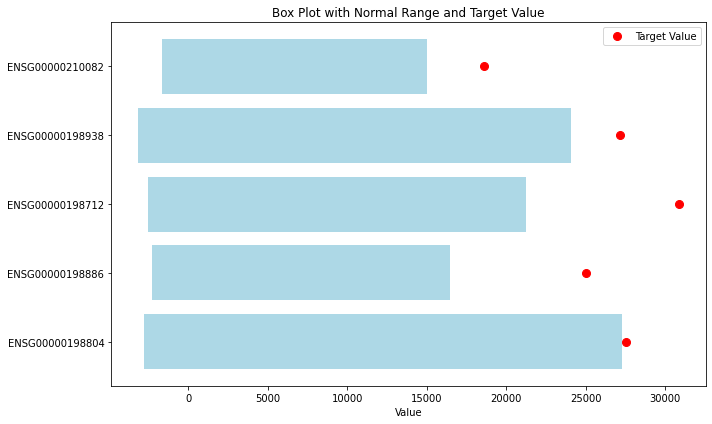

In [101]:
import matplotlib.pyplot as plt

# 数据
genes = [
    "ENSG00000198804", 
    "ENSG00000198886", 
    "ENSG00000198712", 
    "ENSG00000198938", 
    "ENSG00000210082"
]
normal_ranges = [
    (-2785.304548162432, 27262.146811451737),
    (-2292.142092291101, 16481.343198657876),
    (-2497.340981841231, 21254.157373571245),
    (-3131.7249888800707, 24057.577649662133),
    (-1668.0723716269395, 15022.178773327087)
]
target_values = [
    27545.1040, 
    24991.7955, 
    30836.3022, 
    27179.5975, 
    18584.2004
]

# 创建箱线图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
for i, gene in enumerate(genes):
    # 绘制 Normal Range
    ax.broken_barh([(normal_ranges[i][0], normal_ranges[i][1] - normal_ranges[i][0])], (i - 0.4, 0.8), facecolors='lightblue')
    # 特殊标识 Target Value
    ax.plot(target_values[i], i, 'ro', markersize=8, label='Target Value' if i == 0 else "")

# 设置坐标轴标签
ax.set_yticks(range(len(genes)))
ax.set_yticklabels(genes)
ax.set_xlabel('Value')
ax.set_title('Box Plot with Normal Range and Target Value')

# 添加图例
ax.legend()

# 显示图表
plt.tight_layout()
plt.show()